## Laboratorio 5 - Electricidad y Magnetismo

- Camila Ferrus
- Marcelo Ojeda

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.signal as signal
import numpy as np
import astropy.constants as const
import astropy.units as u
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.colors import (ListedColormap, LinearSegmentedColormap)
from scipy.optimize import minimize, curve_fit
from scipy.stats import pearsonr
from scipy.stats import chi2
from sklearn.metrics import mean_squared_error
from astropy.convolution import convolve, Gaussian1DKernel
from scipy.integrate import trapezoid

### Experimento 1

In [47]:
# LEEMOS LOS DATOS DEL CSV, LOS REGISTRAMOS EN UN DATAFRAME 

exp_1_data = pd.DataFrame()
exp_1_data_raw = pd.read_csv('Lab5_datos.csv', sep=';', skiprows=1)

exp_1_data['Voltaje'] = exp_1_data_raw['Voltaje']
exp_1_data['Corriente'] = exp_1_data_raw['Corriente']
exp_1_data

,Voltaje,Corriente
0,0.1,0.21
1,0.8,0.27
2,1.4,0.31
3,2.0,0.34
4,2.2,0.34
5,2.5,0.36
6,3.0,0.37
7,3.2,0.39
8,3.3,0.39
9,3.8,0.40


In [48]:
# CON POLYFIT, HACEMOS UN AJUSTE PARA UN POLINOMIO DE GRADO 1
# PARA OBTENER UN AJUSTE DE LA FORMA V = R * I POR OHM

poly_fit_vc = np.polyfit(exp_1_data['Corriente'], exp_1_data['Voltaje'], 1)
poly_fit_vc

array([27.95002088, -7.0103021 ])

In [49]:
# CALCULAMOS COEFICIENTE DE PEARSON PARA CONOCER LINEALIDAD ENTRE PARAMETROS

pearson_vi = pearsonr(exp_1_data['Corriente'], exp_1_data['Voltaje'])
pearson_vi

(0.9641931725787481, 4.722898067327596e-10)

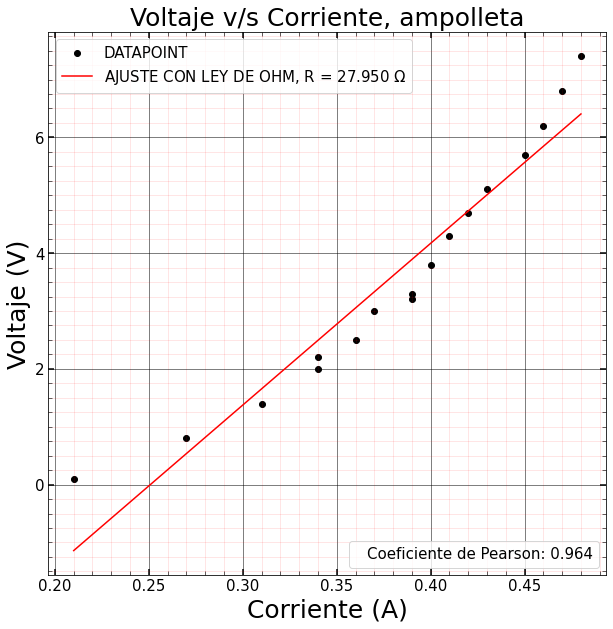

In [50]:
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.scatter(exp_1_data['Corriente'], exp_1_data['Voltaje'], label='DATAPOINT', c='black')

# LA FUNCION np.poly1d SIRVE PARA CREAR UN POLINOMIO DADOS LOS DATOS QUE SACAMOS ARRIBA EN EL AJUSTE
ax1.plot(exp_1_data['Corriente'], np.poly1d(poly_fit_vc)(exp_1_data['Corriente']), c='red', label=r'AJUSTE CON LEY DE OHM, R = {:.3f} $\Omega$'.format(
    poly_fit_vc[0]
))
ax1.set_title('Voltaje v/s Corriente, ampolleta', fontsize=25)
ax1.set_ylabel(r'Voltaje (V)', fontsize=25)
ax1.set_xlabel(r'Corriente (A)', fontsize=25)

extra_legend_1 = mpatches.Patch(label=r'Coeficiente de Pearson: {:.3f}'.format(pearson_vi[0]))
handles, labels = ax1.get_legend_handles_labels()
handles.append(extra_legend_1)
extra_legend = ax1.legend(handles=[extra_legend_1], loc='lower right', bbox_to_anchor=(1.0, 0.0), fontsize=15, markerscale=0, handlelength=0)
extra_legend.legendHandles[0].set_visible(False)
ax1.add_artist(extra_legend)

ax1.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

ax1.yaxis.set_minor_locator(MultipleLocator(0.25))
ax1.xaxis.set_minor_locator(MultipleLocator(0.01))
ax1.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax1.grid(True, which='both')
ax1.legend(fontsize=15)

- COMENTAR SOBRE LA LINEALIDAD: CONDUCTOR OHMICO, PEARSON
- MATERIALES UTILIZADOS EN FILAMENTOS
- COMENTAR ERRORES: POR QUÉ HAY OUTLIERS Y POR QUÉ NO ES COMPLETAMENTE LINEAL --> ERRORES SIST Y ALEATORIOS 

### Experimento 2

In [51]:
carga_datos_path = os.path.join("CURVA_CARGA", "F0000CH1.CSV")
carga_datos_raw = pd.read_csv(carga_datos_path, names=["col1", "col2", "col3", "col4", "col5","col6"])

mask = carga_datos_raw['col5'] > -7

carga_datos = pd.DataFrame()
carga_datos['Tiempo'] = carga_datos_raw[mask]["col4"]
carga_datos['Voltaje'] = carga_datos_raw[mask]["col5"]
carga_datos

,Tiempo,Voltaje
0,0.00,0.00
1,0.02,0.00
2,0.04,0.00
3,0.06,0.00
4,0.08,0.00
...,...,...
2205,44.10,7.92
2206,44.12,7.92
2207,44.14,8.00
2208,44.16,7.92


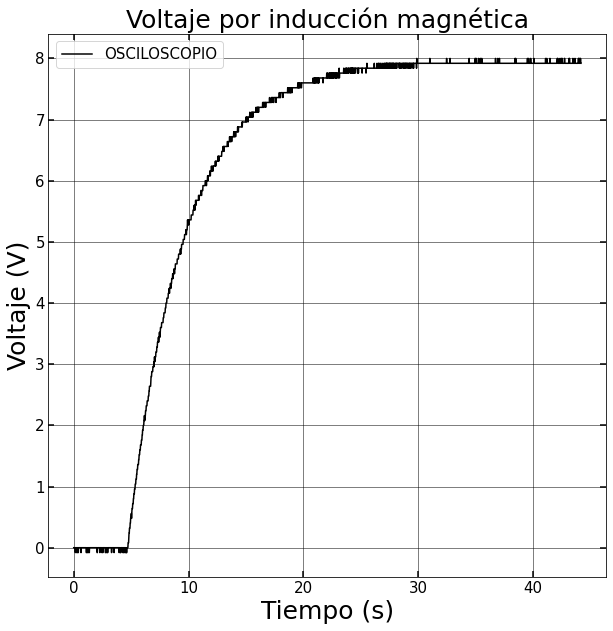

In [52]:
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.plot(carga_datos['Tiempo'], carga_datos['Voltaje'], label='OSCILOSCOPIO', c='black')
ax1.set_title('Voltaje por inducción magnética', fontsize=25)
ax1.set_ylabel(r'Voltaje (V)', fontsize=25)
ax1.set_xlabel(r'Tiempo (s)', fontsize=25)
# ax1.set_xlim(0.5, 4.5)
# ax1.set_ylim(-10, 10)


ax1.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
              length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
              grid_linewidth=0.5)

# ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
# ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')

ax1.grid(True, which='both')
ax1.legend(fontsize=15)